In [4]:
#DATASET--> IRIS
#ANALIZZARE SOLO DUE CARATTERISTICHE
#X--> LUNGHEZZA E LARGHEZZA DEL PETALO --> MATRICE X
#ARRAY Y --> CORRISPONDENTI ETICHETTE DELLE CLASSI DI SPECIE

pip install scikit-learn
from sklearn import datasets
import numpy as np
import pandas as pd

# iris=pd.read_csv("C:/Users/ssanti/Desktop/iris.data.csv",
#            header=None,encoding="utf-8")
# iris.head()
#print(iris)

iris=datasets.load_iris()
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [46]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
#x--> matrice di covariate, tutte le righe, colonne 2 e 3
#y--> colonna target


X=iris.data[:,[2,3]]
y=iris.target
print("Class label:",np.unique(y))
#la funzione np.unique ha trasformato le etichette della colonna target
#in 0 1 2 --> che equivalgono alle 3 tipologie del fiore Iris


Class label: [0 1 2]


In [10]:
#suddivido il dataset in addestramento e test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=1,stratify=y)

#possiamo verificare se il dataset di addestramento è stato preso al 70%
#attraverso la funzione np.bincount

print("dataset intero:",np.bincount(y))
print("dataset di addestramento:",np.bincount(y_train))
print("dataset di test:",np.bincount(y_test))

#procedo con la standardizzazione dei dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)#la funzione fit ha stimato media e varianza per ogni caratteristica
x_train_std=sc.transform(X_train)
x_test_std=sc.transform(X_test)


dataset intero: [50 50 50]
dataset di addestramento: [35 35 35]
dataset di test: [15 15 15]


In [25]:
#fase di addestramento 
from sklearn.linear_model import Perceptron

ppn=Perceptron(eta0=0.1,random_state=1)
ppn.fit(x_train_std,y_train)


Perceptron(eta0=0.1, random_state=1)

In [30]:
#fase di predizione
y_pred=ppn.predict(x_test_std)
print("Misclassificated example: %d" % (y_test !=y_pred).sum())
#accuratezza
from sklearn.metrics import accuracy_score
print("accuratezza: %.3f" % accuracy_score(y_test,y_pred))

Misclassificated example: 1
accuratezza: 0.978


C:\Users\ssanti\AppData\Local\Temp\ipykernel_13200\1365406089.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


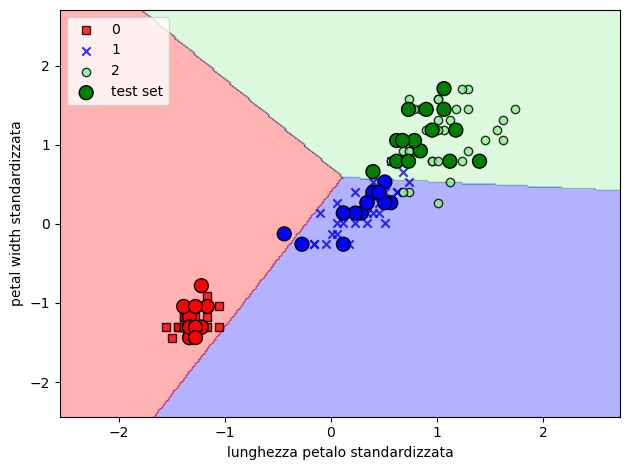

In [58]:
#visualizziamo i risultati
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
#plottiamo tutti gli esempi
    if test_idx:
        X_test,y_test=X[test_idx,:],y[test_idx] #sto definendo i miei dataset di training e test
        #creo dataframe,in x_test ho due colonne che ho separato X_test_0 X_test_1
        #la mia terza colonna è la y_test
        df = pd.DataFrame(dict(X_test_0=X_test[:,0],X_test_1=X_test[:,1], y_test=y_test))
        #creo un dizionario di colori
        colori = {0:'red', 2:'green', 1:'blue'}
        
        
        plt.scatter(df["X_test_0"],df["X_test_1"],
                    c=df["y_test"].map(colori),edgecolor="black",alpha=1.0,
                    linewidth=1,marker="o",
                    s=100,label="test set")
    
x_combinated_std=np.vstack((x_train_std,x_test_std))
y_combined=np.hstack((y_train,y_test))

plot_decision_regions(X=x_combinated_std,
                    y=y_combined,
                    classifier=ppn,
                    test_idx=range(105,150))

plt.xlabel("lunghezza petalo standardizzata")
plt.ylabel("petal width standardizzata")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [59]:
print(y_test)

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


C:\Users\ssanti\AppData\Local\Temp\ipykernel_13200\1727397051.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


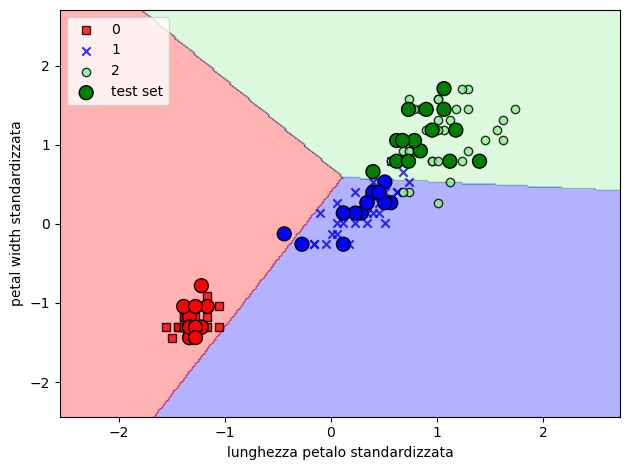

In [65]:
################PROVA###############################################
#visualizziamo i risultati
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
#plottiamo tutti gli esempi
    if test_idx:
        X_test,y_test=X[test_idx,:],y[test_idx] #sto definendo i miei dataset di training e test
        colore=[]
        for i in y_test:
            if i == 0:
                colore.append("red")   
            elif i==1:
                colore.append("blue")
            else:
                colore.append("green")
                
    plt.scatter(X_test[:,0],X_test[:,1],
    c=colore,edgecolor="black",alpha=1.0,
    linewidth=1,marker="o",
    s=100,label="test set")

x_combinated_std=np.vstack((x_train_std,x_test_std))
y_combined=np.hstack((y_train,y_test))

plot_decision_regions(X=x_combinated_std,
                    y=y_combined,
                    classifier=ppn,
                    test_idx=range(105,150))

plt.xlabel("lunghezza petalo standardizzata")
plt.ylabel("petal width standardizzata")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()